# Data Analysis Tech Degree Unit 6: Graphing Video Game Sales

You’re reviewing sales for the top 100 video games from the years 2000-2015 to gather insights. Use Python’s Pandas, Matplotlib, and Seaborn libraries to interact with the data and create graphs.


## Importing libraries 
``` python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

```

In [33]:

import sys
import itertools

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np


%matplotlib inline

In [34]:
video_games_info=pd.read_csv('top100videogamesales.csv')
video_games_info





,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Big Brain Academy,Nintendo,2005,Misc,Nintendo,1.67,2.78,1.60,0.62,6.67
96,97,Red Dead Redemption,PlayStation,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
97,98,FIFA 15,PlayStation,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
98,99,Donkey Kong Country Returns,Nintendo,2010,Platform,Nintendo,3.25,1.84,1.03,0.47,6.59


## Meets Expectations

###  1. Question 1: 
    A line chart shows the total global sales for each year.
    The result of the chart is explained in markdown.


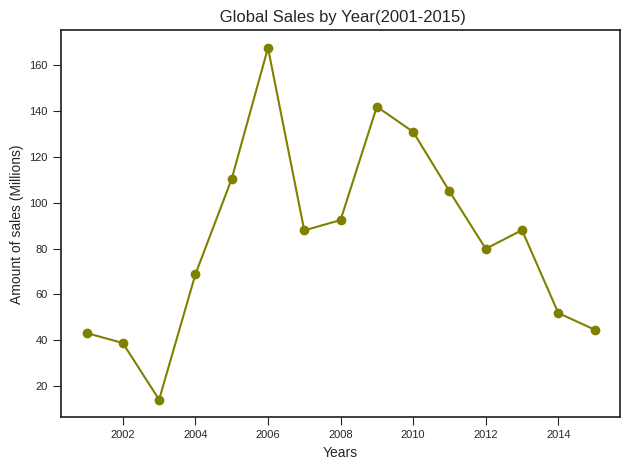

In [35]:
# let's select 2  columns, year and total global sales
yearly_sales=video_games_info[['Year','Global_Sales']]
grouped_sales=yearly_sales.groupby('Year')

sum_of_sales=grouped_sales.sum()


list_of_years=[]
list_of_sales=[]

   
for year, sale in sum_of_sales.iterrows():
   
    list_of_years.append(year)
    list_of_sales.append(sale)



  
plt.title(' Global Sales by Year(2001-2015)')
#print(plt.style.available)
plt.style.use(['seaborn-v0_8-ticks'])

plt.xlabel('Years')
plt.ylabel('Amount of sales (Millions)')



plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.plot(list_of_years, list_of_sales, marker='o',color='olive')
plt.tight_layout()


plt.show()

### Explanation

*The years with the most video games sales are 
*
*


### 2.  Question 2
    A histogram shows the global sales distribution for games with Action as the genre.
    The result of the chart is explained in markdown.


/tmp/ipykernel_10426/1106043715.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


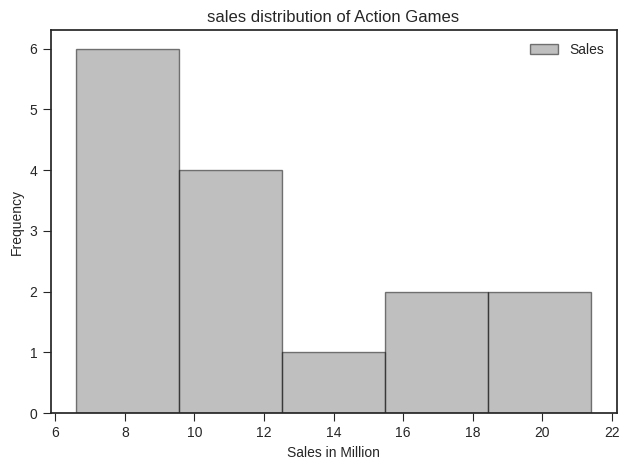

In [36]:

video_games_info.head()
action_games=video_games_info.loc[video_games_info.Genre=='Action']
grouped_by_sales=action_games['Global_Sales']

colors = ['red', 'blue', 'grey']
sorted_sales=grouped_by_sales.sort_values(ascending=True)
weights = np.random.rand(len(sorted_sales))
plt.title('sales distribution of Action Games')
plt.hist(sorted_sales,bins='auto',edgecolor='black',alpha=0.5, color="grey")
plt.xlabel('Sales in Million')
plt.ylabel('Frequency')
plt.legend()
plt.legend(['Sales'])
plt.tight_layout()
plt.show()

### Explanation

### 3. Question 3:

* A pie chart shows the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
* A pie chart shows the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
    Detailed what is included in the other category.
    The differences and similarities between the North American and European charts are explained in markdown


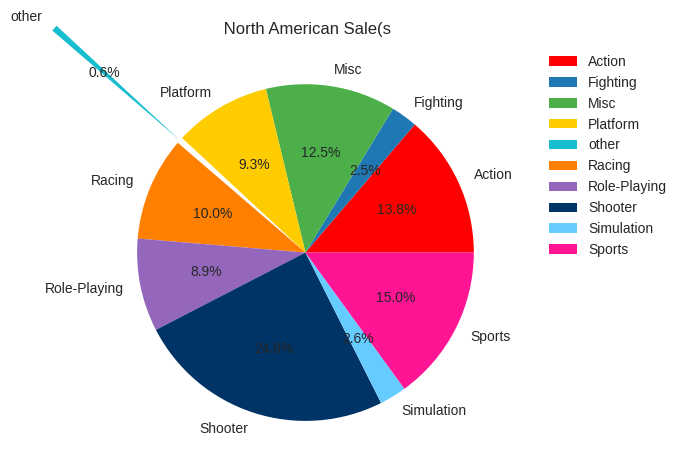

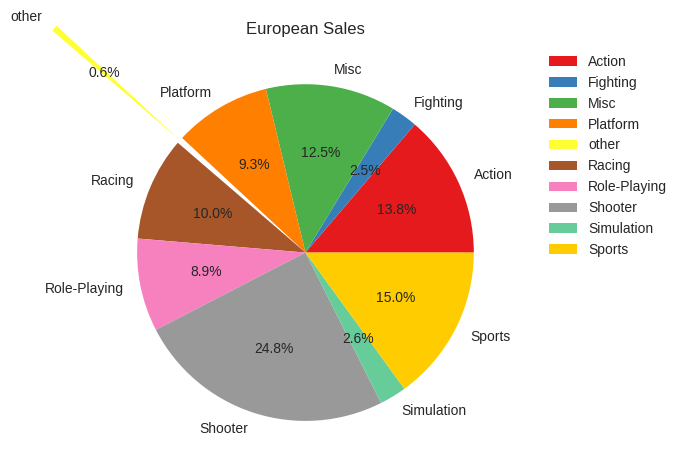

10

In [37]:
#North American Sales info
North_American_Sales=video_games_info[['Genre', 'NA_Sales']]
NA_Sales_group=North_American_Sales.groupby('Genre')
NA_Sales_sum=NA_Sales_group.sum()
#puzzle,fighting Simulation are the least ones
#European sales

Europen_Sales=video_games_info[['Genre','EU_Sales']]

European_Sales_group=Europen_Sales.groupby('Genre')
European_Sales_sum=European_Sales_group.sum()
#European_Sales_group=European_Sales.groupby('Genre')
European_Sales_sum=European_Sales_group.sum()

#
na_labels=[]
na_sales=[]

eu_labels=[]
eu_sales=[]



for genre, na_sale in NA_Sales_sum.iterrows():
    na_labels.append(genre)
    na_sales.append(na_sale.iloc[0])

for eu_genre, eu_sale in NA_Sales_sum.iterrows():
    eu_labels.append(eu_genre)
    eu_sales.append(eu_sale.iloc[0])

na_dict= { k:v for (k,v) in zip(na_labels, na_sales)}
eu_dict={k:v for (k,v) in zip(eu_labels, eu_sales)}



new_na_dict={}
new_eu_dict={}
for key, group in itertools.groupby(na_dict, lambda k: 'other' if (na_dict[k]<6) else k):
     new_na_dict[key] = sum([na_dict[k] for k in list(group)])  

for key, group in itertools.groupby(eu_dict, lambda k: 'other' if(eu_dict[k]<6) else k):
    new_eu_dict[key]=sum([eu_dict[k]for k in list(group)])


new_na_labels=new_na_dict.keys()
new_na_sales=new_na_dict.values()
new_eu_labels=new_eu_dict.keys()
new_eu_sales= new_eu_dict.values()

na_colors=colors = [
    '#FF0000',  #  - Red
    '#1f77b4',  #  - Blue
    '#4DAF4A',  #  - Green
    '#FFCC00',  #  - Yellow
    '#17becf',  #  - Teal
    '#FF7F00',  #  - Orange
    '#9467bd',  #  - Purple
    '#003366',  #  - Dark Blue
    '#66CCFF',  #  - Light Blue
    '#FF1493'   #  - Pink
]
plt.title(' North American Sale(s')
plt.pie(new_na_sales, labels=new_na_labels,autopct='%1.1f%%',colors=na_colors, explode=(0,0,0,0,1,0,0,0,0,0), normalize=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



plt.title('European Sales')
eu_colors = colors = [
    '#E41A1C',  # Red
    '#377EB8',  # Blue
    '#4DAF4A',  # Green
    '#FF7F00',  # Orange
    '#FFFF33',  # Yellow
    '#A65628',  # Brown
    '#F781BF',  # Pink
    '#999999',  # Gray
    '#66CC99',  # Light Green
    '#FFCC00'   # Yellow-orange
]
plt.pie(new_eu_sales, labels=new_eu_labels,autopct='%1.1f%%',colors=eu_colors,explode=(0,0,0,0,1,0,0,0,0,0), normalize=True)
#shooter sports and action
#Simulation, Puzzle, Fighting 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
len(new_eu_sales)

### Explanation

#### Similarities
The differences and similarities between the North American and European charts are explained in markdown

#### Differences



### Question 4

A bar (or column) chart to show the total number of games created for each platform in the dataset.
    The results are explained in markdown.




/tmp/ipykernel_10426/176646466.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


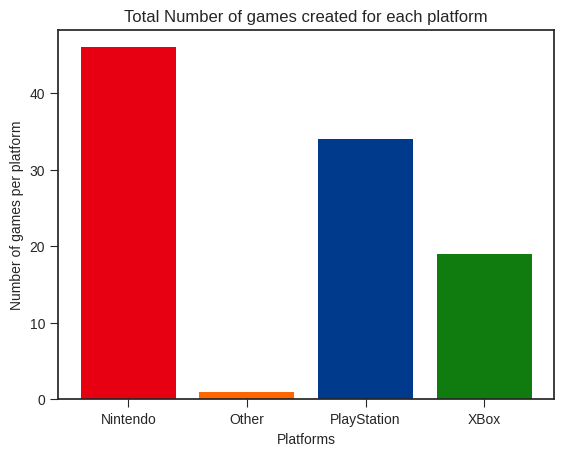

In [38]:
games_and_platforms=video_games_info[['Name','Platform']]
games_and_platforms
#group_by_platform
grouped_games=games_and_platforms.groupby('Platform')

platform_list=[]
game_count_list=[]


games_count= grouped_games.size()
for platform , game_number in games_count.items():
    platform_list.append(platform)
    game_count_list.append(game_number)
    
plt.title('Total Number of games created for each platform')
plt.bar(platform_list, game_count_list,color=['#E60012','#FF6600','#003A8C','#107C10'   ])
plt.xlabel('Platforms')
plt.ylabel('Number of games per platform')
plt.legend(loc='upper left')
plt.show()



#### Explanation

## Exceeds Expectations

    



   1.  The question: “What percentage of global sales does PlayStation have in the dataset?” is answered with an appropriate chart and markdown.

    A stacked column (or bar) chart shows the sales by region for each publisher in the data.

    Chart is explained with markdown and details which publisher had the most sales.

    Charts are not in the default color and settings.


In [64]:
play_station_sale=video_games_info[['Platform','Global_Sales']]
play_station_sale_group=play_station_sale.groupby('Platform')


play_station_sale_group_sum=play_station_sale_group.sum()
play_station_sale_group_sum

play_labels=[]
play_values=[]

for label, value in play_station_sale_group_sum.items():
    





#what percentage of gobal sales does playstation ahve in the dataset?


Global_Sales




    The question: “What is the distribution of sales for Shooter games?” is answered with an appropriate chart and markdown.

    Charts are not in the default color and settings.




    The question: “What genre of game is present the most in the top 100 games from 2000-2015?” is answered with an appropriate chart and markdown.

    Charts are not in the default color and settings.
